### AI Study 
using many methods at once with MNIST data



My code explanation may appear to indicate that my English skills are poor, but that is not the case. I am intentionally using fewer words for the purpose of making it easier to read and understand.    
look :  my code explain is bad. i do it to make you read fast    

Code Explain :   

This code is MNIST data code. Hand Writing image guess code.  
Hardware part use gpu in pc and mac.  
Random seed fix is to make same result every time  
Parameters have infomation about learning rate, epoch, batch size, drop out  
  
about model see 'models' list  
'models' list show number of layer and optimizer and drop  
5 layers models use init.xavier_normal to make model good  
In ML part they use all kinds of models and show result  
At last test part . they pick one and show one  

In [114]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

#####  Hardware

In [115]:
##Hardware
import torch
if torch.cuda.is_available() == True:
  device = 'cuda'
  templist = [1,2,3]
  templist = torch.FloatTensor(templist).to(device)
  print("Cuda torch working : ",end="")
  print(templist.is_cuda)
  print("current device no. : ",end="")
  print(torch.cuda.current_device())
  print("GPU device count : ",end="")
  print(torch.cuda.device_count())
  print("GPU name : ",end="")
  print(torch.cuda.get_device_name(0))
  print("device : ",device)
elif torch.backends.mps.is_available() == True:
  print("Apple device detected\nActivating Apple Silicon GPU")
  device = torch.device("mps")
else:
  print("cant use gpu , activating cpu")
  device = 'cpu'

Cuda torch working : True
current device no. : 0
GPU device count : 1
GPU name : NVIDIA GeForce GTX 1080
device :  cuda


##### Random Seed

In [116]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

#### Parameters

In [117]:
LR_list = [10000,100,1,1e-2,1e-4,1e-6,1e-8]
learning_rate = [1e-3]
nb_epoch = 15
batch_size = 10
drop_out_posibility = 0.3
def show_parameters():
  print("Learning list : ",LR_list)
  print("Learning rate : ",learning_rate)
  print("Nb_epoch : ",nb_epoch)
  print("Batch size : ",batch_size)
  print("dropout : ",drop_out_posibility)
show_parameters()

Learning list :  [10000, 100, 1, 0.01, 0.0001, 1e-06, 1e-08]
Learning rate :  [0.001]
Nb_epoch :  15
Batch size :  10
dropout :  0.3


##### Download MNIST data

In [118]:
mnist_train= data.MNIST(root='MNIST_data',
                        train = True, #bring train data
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test = data.MNIST(root='MNIST_data',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

#### Set data loader

In [119]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, #batch size at parameters
                                          shuffle=True, #mix it up
                                          drop_last=True) #len(data)%batch = left overs shoud I drop this or not?

In [120]:

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


#### Model presets

In [121]:
##One layer model
linear1 = torch.nn.Linear(784,10,bias=True)

##Five layer model
linear51 = torch.nn.Linear(784,512,bias=True)
linear52 = torch.nn.Linear(512,512,bias=True)
linear53 = torch.nn.Linear(512,512,bias=True)
linear54 = torch.nn.Linear(512,512,bias=True)
linear55 = torch.nn.Linear(512,10,bias=True)


##Line model
relu = torch.nn.ReLU()
#dropout
dropout = torch.nn.Dropout(p=drop_out_posibility)
#loss
loss = torch.nn.CrossEntropyLoss().to(device)

models = [['1layer','SGD'],['5layer','SGD'],['1layer','Adam'],['5layer','Adam'],['5layer+drop','SGD'],['5layer+drop','Adam']]


def choose_model(LR,layer,optim):
  global model
  global optimzier
  if layer == '1layer':
    torch.nn.init.normal_(linear1.weight)
    model = torch.nn.Sequential(linear1).to(device)
    #print("layer1")
  elif layer == '5layer':
    torch.nn.init.xavier_normal_(linear51.weight)##
    torch.nn.init.xavier_normal_(linear52.weight)
    torch.nn.init.xavier_normal_(linear53.weight)
    torch.nn.init.xavier_normal_(linear54.weight)
    torch.nn.init.xavier_normal_(linear55.weight)
    model = torch.nn.Sequential(linear51,relu,
                                linear52,relu,
                                linear53,relu,
                                linear54,relu,
                                linear55).to(device)
    #print("layer5")
  elif layer == '5layer+drop':
    torch.nn.init.xavier_normal_(linear51.weight)
    torch.nn.init.xavier_normal_(linear52.weight)
    torch.nn.init.xavier_normal_(linear53.weight)
    torch.nn.init.xavier_normal_(linear54.weight)
    torch.nn.init.xavier_normal_(linear55.weight)
    model = torch.nn.Sequential(linear51,relu,dropout,
                                linear52,relu,dropout,
                                linear53,relu,dropout,
                                linear54,relu,dropout,
                                linear55).to(device)
    model.train()#we need this when dropout
    #print("layer5 drop")
  else:
    print("Error : Unknown Layer option please check models list")
  if optim == 'SGD':
    optimzier = torch.optim.SGD(model.parameters(),lr=LR)
    #print("SGD")
  elif optim == 'Adam':
    optimzier = torch.optim.Adam(model.parameters(),lr=LR)
    #print("Adam")
  else:
    print("Error unknown optim option please check models list")


choose_model(LR_list[0],models[0][0],models[0][1])

defalt


#### ML

In [122]:
from tqdm import tqdm
batch_len = len(data_loader)

for LR in learning_rate:
  for layer,optim in models:
    choose_model(LR,layer,optim)#function chooseing model
    
    for epoch in tqdm(range(nb_epoch)):
      avg_cost = 0
      for X , Y in (data_loader):
        
        #change image to 1 dim list
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        #reset grad
        optimzier.zero_grad()
        #foward
        hypothesis = model(X)
        #Error
        cost = loss(hypothesis,Y)
        # Backparopagation
        cost.backward()
        #cal weight
        optimzier.step()
        #avr cal
        avg_cost = avg_cost + cost/batch_len
    ## ACC
    with torch.no_grad():
      model.eval()
      X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
      Y_test = mnist_test.test_labels.to(device)
      
      prediction = model(X_test)
      correct_prediction = torch.argmax(prediction, 1) == Y_test
      accuracy = correct_prediction.float().mean()
    print("With %.0E Learning rate #%s#  layer ,#%s#  optim model Avr Cost : #%.3f#  Accuracy : %.3F %%"%(LR,layer,optim,avg_cost,accuracy.item()*100))

100%|██████████| 15/15 [02:05<00:00,  8.34s/it]
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


With 1E-03 Learning rate #1layer#  layer ,#SGD#  optim model Avr Cost : #1.051#  Accuracy : 78.950 %


100%|██████████| 15/15 [02:55<00:00, 11.68s/it]


With 1E-03 Learning rate #5layer#  layer ,#SGD#  optim model Avr Cost : #0.094#  Accuracy : 96.220 %


100%|██████████| 15/15 [02:19<00:00,  9.30s/it]


With 1E-03 Learning rate #1layer#  layer ,#Adam#  optim model Avr Cost : #0.287#  Accuracy : 86.430 %


100%|██████████| 15/15 [03:57<00:00, 15.82s/it]


With 1E-03 Learning rate #5layer#  layer ,#Adam#  optim model Avr Cost : #0.040#  Accuracy : 97.850 %


100%|██████████| 15/15 [03:17<00:00, 13.14s/it]


With 1E-03 Learning rate #5layer+drop#  layer ,#SGD#  optim model Avr Cost : #0.211#  Accuracy : 91.240 %


100%|██████████| 15/15 [04:11<00:00, 16.74s/it]

With 1E-03 Learning rate #5layer+drop#  layer ,#Adam#  optim model Avr Cost : #0.180#  Accuracy : 97.520 %


Label:  7
Prediction:  7


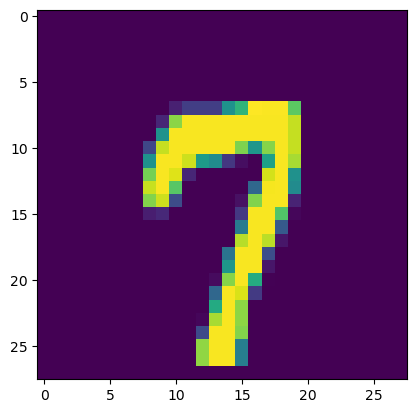

In [126]:
# random test
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())